In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data = data.drop_duplicates()
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
data.drop(columns=['id'], inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
y=data['stroke']
X=data.drop('stroke',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Mean imputation on bmi
X_train['bmi'] = X_train['bmi'].fillna( X_train['bmi'].median())
X_test['bmi'] = X_test['bmi'].fillna( X_test['bmi'].median())


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score


In [5]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical columns
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)




In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
logistic_model = LogisticRegression()

# Define the pipeline including logistic regression classifier
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined and includes necessary preprocessing steps
    ('scaler', StandardScaler()),  # Scaling features can be beneficial for logistic regression
    ('classifier', logistic_model)
])

# Fit the model on the training data
logistic_pipeline.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred_logistic = logistic_pipeline.predict(X_train)
y_test_pred_logistic = logistic_pipeline.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy_logistic = accuracy_score(y_train, y_train_pred_logistic)
test_accuracy_logistic = accuracy_score(y_test, y_test_pred_logistic)
train_f1_logistic = f1_score(y_train, y_train_pred_logistic)
test_f1_logistic = f1_score(y_test, y_test_pred_logistic)

print(f'Train Accuracy (Logistic Regression): {train_accuracy_logistic:.6f}')
print(f'Test Accuracy (Logistic Regression): {test_accuracy_logistic:.6f}')
print(f'Train F1 Score (Logistic Regression): {train_f1_logistic:.6f}')
print(f'Test F1 Score (Logistic Regression): {test_f1_logistic:.6f}')


Train Accuracy (Logistic Regression): 0.954501
Test Accuracy (Logistic Regression): 0.939335
Train F1 Score (Logistic Regression): 0.010638
Test F1 Score (Logistic Regression): 0.000000


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# Define the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the KNN classifier model
knn_model = KNeighborsClassifier()

# Define the pipeline including the scaler and KNN classifier
knn_pipeline = Pipeline(steps=[
   ('preprocessor', preprocessor),  # Assuming preprocessor is defined and includes necessary preprocessing steps
    ('scaler', StandardScaler()),  # Scaling features can be beneficial for KNN
    ('classifier', knn_model)
])

# Define the grid of hyperparameters to test
param_grid = {
    'classifier__n_neighbors': [5, 10, 15, 20],  # Set a range of values for 'k'
}

# Define scoring metrics for cross-validation
scoring_metrics = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score, average='macro'),  # Using macro average for F1 score
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring=scoring_metrics, refit='accuracy')

# Fit the GridSearchCV model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_knn_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Test accuracy and F1 score for the best model
test_accuracy = best_knn_model.score(X_test, y_test)

y_test_pred = best_knn_model.predict(X_test)
test_f1 = f1_score(y_test, y_test_pred)  # Using macro average for F1 score

# Print test results
print(f"Best KNN parameters: {best_params}")
print(f"Test Accuracy: {test_accuracy:.6f}")
print(f"Test F1 Score: {test_f1:.6f}")


Best KNN parameters: {'classifier__n_neighbors': 20}
Test Accuracy: 0.939335
Test F1 Score: 0.000000


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Define the KNN classifier model
knn_model = KNeighborsClassifier(n_neighbors=20)
# Define the pipeline including KNN classifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined and includes necessary preprocessing steps
    ('scaler', StandardScaler()),  # Scaling features can be beneficial for KNN
    ('classifier', knn_model)
])

# Fit the model on the training data
knn_pipeline.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred_knn = knn_pipeline.predict(X_train)
y_test_pred_knn = knn_pipeline.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
train_f1_knn = f1_score(y_train, y_train_pred_knn)
test_f1_knn = f1_score(y_test, y_test_pred_knn)

print(f'Train Accuracy (KNN): {train_accuracy_knn:.6f}')
print(f'Test Accuracy (KNN): {test_accuracy_knn:.6f}')
print(f'Train F1 Score (KNN): {train_f1_knn:.6f}')
print(f'Test F1 Score (KNN): {test_f1_knn:.6f}')


Train Accuracy (KNN): 0.954256
Test Accuracy (KNN): 0.939335
Train F1 Score (KNN): 0.010582
Test F1 Score (KNN): 0.000000


In [ ]:
from sklearn.svm import SVC
# Define the SVM classifier model
svm_model = SVC(kernel='rbf', random_state=42)  # Example: Using a radial basis function (RBF) kernel

# Define the pipeline including SVM classifier
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined and includes necessary preprocessing steps
    ('scaler', StandardScaler()),  # Scaling features can be beneficial for SVM
    ('classifier', svm_model)
])

# Fit the model on the training data
svm_pipeline.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred_svm = svm_pipeline.predict(X_train)
y_test_pred_svm = svm_pipeline.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
train_f1_svm = f1_score(y_train, y_train_pred_svm)
test_f1_svm = f1_score(y_test, y_test_pred_svm)

print(f'Train Accuracy (SVM): {train_accuracy_svm:.6f}')
print(f'Test Accuracy (SVM): {test_accuracy_svm:.6f}')
print(f'Train F1 Score (SVM): {train_f1_svm:.6f}')
print(f'Test F1 Score (SVM): {test_f1_svm:.6f}')


Train Accuracy (SVM): 0.954746
Test Accuracy (SVM): 0.939335
Train F1 Score (SVM): 0.021164
Test F1 Score (SVM): 0.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Define the Random Forest classifier model
random_forest_model = RandomForestClassifier(n_estimators=150, random_state=42,max_depth=10,min_samples_split=5)

# Define the pipeline including Random Forest classifier
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined
    ('classifier', random_forest_model)
])

# Fit the model on the training data
random_forest_pipeline.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred_rf = random_forest_pipeline.predict(X_train)
y_test_pred_rf = random_forest_pipeline.predict(X_test)

# Make predictions on the training and testing sets
y_train_pred_rf = random_forest_pipeline.predict(X_train)
y_test_pred_rf = random_forest_pipeline.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)

print(f'Train Accuracy (Random Forest): {train_accuracy_rf:.6f}')
print(f'Test Accuracy (Random Forest): {test_accuracy_rf:.6f}')
print(f'Train F1 Score (Random Forest): {train_f1_rf:.6f}')
print(f'Test F1 Score (Random Forest): {test_f1_rf:.6f}')



Train Accuracy (Random Forest): 0.957436
Test Accuracy (Random Forest): 0.939335
Train F1 Score (Random Forest): 0.130000
Test F1 Score (Random Forest): 0.000000


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Define the XGBoost model
xgboost_model = xgb.XGBClassifier(objective='binary:logistic',random_state=42)

# Define the pipeline including XGBoost model
xgboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined
    ('classifier', xgboost_model)
])

# Fit the model on the training data
xgboost_pipeline.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred_xgb = xgboost_pipeline.predict(X_train)
y_test_pred_xgb = xgboost_pipeline.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
train_f1_xgb = f1_score(y_train, y_train_pred_xgb)
test_f1_xgb = f1_score(y_test, y_test_pred_xgb)

print(f'Train Accuracy (XGBoost): {train_accuracy_xgb:.6f}')
print(f'Test Accuracy (XGBoost): {test_accuracy_xgb:.6f}')
print(f'Train F1 Score (XGBoost): {train_f1_xgb:.6f}')
print(f'Test F1 Score (XGBoost): {test_f1_xgb:.6f}')

Train Accuracy (XGBoost): 0.998288
Test Accuracy (XGBoost): 0.939335
Train F1 Score (XGBoost): 0.980926
Test F1 Score (XGBoost): 0.184211


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
top_feature_names = [feature for feature, _ in sorted_feature_importances[:6]]
X_train_onehot = preprocessor.fit_transform(X_train)
X_test_onehot = preprocessor.fit_transform(X_test)
onehot_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(input_features=categorical_features)
onehot_feature_names_train = onehot_feature_names[onehot_feature_names != 'gender_Other']
X_train_onehot_df = pd.DataFrame(X_train_onehot,columns = list(onehot_feature_names_train)+list(numeric_features))
X_test_onehot_df = pd.DataFrame(X_test_onehot,columns = list(onehot_feature_names)+list(numeric_features))
X_train_top = X_train_onehot_df[list(top_feature_names)]
X_test_top = X_test_onehot_df[list(top_feature_names)]

# Define the XGBoost model
xgboost_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the pipeline including XGBoost model with top features
xgboost_pipeline_top_features = Pipeline(steps=[
    ('classifier', xgboost_model)
])
# Fit the model on the transformed training data with one-hot encoded format
xgboost_pipeline_top_features.fit(X_train_top, y_train)

# Make predictions on the training and testing sets
y_train_pred_xgb_top = xgboost_pipeline_top_features.predict(X_train_top)
y_test_pred_xgb_top = xgboost_pipeline_top_features.predict(X_test_top)

# Calculate accuracy for training and testing sets
train_accuracy_xgb_top = accuracy_score(y_train, y_train_pred_xgb_top)
test_accuracy_xgb_top = accuracy_score(y_test, y_test_pred_xgb_top)
train_f1_xgb_top = f1_score(y_train, y_train_pred_xgb_top)
test_f1_xgb_top = f1_score(y_test, y_test_pred_xgb_top)


print(f'Train Accuracy (XGBoost with top features): {train_accuracy_xgb_top:.6f}')
print(f'Test Accuracy (XGBoost with top features): {test_accuracy_xgb_top:.6f}')
print(f'Train F1 Score (XGBoost with top features): {train_f1_xgb_top:.6f}')
print(f'Test F1 Score (XGBoost with top features): {test_f1_xgb_top:.6f}')


Train Accuracy (XGBoost with top features): 0.954256
Test Accuracy (XGBoost with top features): 0.939335
Train F1 Score (XGBoost with top features): 0.000000
Test F1 Score (XGBoost with top features): 0.000000


Results after handling class imbalance


In [6]:
!pip install imbalanced-learn


In [8]:
from imblearn.over_sampling import SMOTE
import pandas as pd

X_train_onehot = preprocessor.fit_transform(X_train)
X_test_onehot = preprocessor.fit_transform(X_test)
onehot_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(input_features=categorical_features)
onehot_feature_names_train = onehot_feature_names[onehot_feature_names != 'gender_Other']
X_train_onehot_df = pd.DataFrame(X_train_onehot,columns = list(numeric_features)+list(onehot_feature_names_train))
X_test_onehot_df = pd.DataFrame(X_test_onehot,columns = list(numeric_features) +list(onehot_feature_names))
X_test_onehot_df.drop(columns=['gender_Other'], inplace=True)


# Assuming 'X' and 'y' are your feature and target variables
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_onehot, y_train)
X_smote_df = pd.DataFrame(X_smote, columns=X_train_onehot_df.columns)



In [10]:
#XGBOOST WITH SMOTE
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Define the XGBoost model
xgboost_model = xgb.XGBClassifier(objective='binary:logistic',random_state=42)

# Define the pipeline including XGBoost model
xgboost_pipeline = Pipeline(steps=[
    ('classifier', xgboost_model)
])

# Fit the model on the training data
xgboost_pipeline.fit(X_smote_df, y_smote)

# Make predictions on the training and testing sets
y_train_pred_xgb = xgboost_pipeline.predict(X_smote_df)
y_test_pred_xgb = xgboost_pipeline.predict(X_test_onehot_df)

# Calculate accuracy for training and testing sets
train_accuracy_xgb = accuracy_score(y_smote, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
train_f1_xgb = f1_score(y_smote, y_train_pred_xgb)
test_f1_xgb = f1_score(y_test, y_test_pred_xgb)

print(f'Train Accuracy (XGBoost): {train_accuracy_xgb:.6f}')
print(f'Test Accuracy (XGBoost): {test_accuracy_xgb:.6f}')
print(f'Train F1 Score (XGBoost): {train_f1_xgb:.6f}')
print(f'Test F1 Score (XGBoost): {test_f1_xgb:.6f}')

Train Accuracy (XGBoost): 0.997949
Test Accuracy (XGBoost): 0.886497
Train F1 Score (XGBoost): 0.997947
Test F1 Score (XGBoost): 0.226667


In [11]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_xgb)

# Calculate class-wise accuracy
class_accuracies = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Output the class-wise accuracy
for i, acc in enumerate(class_accuracies):
    print(f'Class {i} Accuracy: {acc:.6f}')

Class 0 Accuracy: 0.926042
Class 1 Accuracy: 0.274194


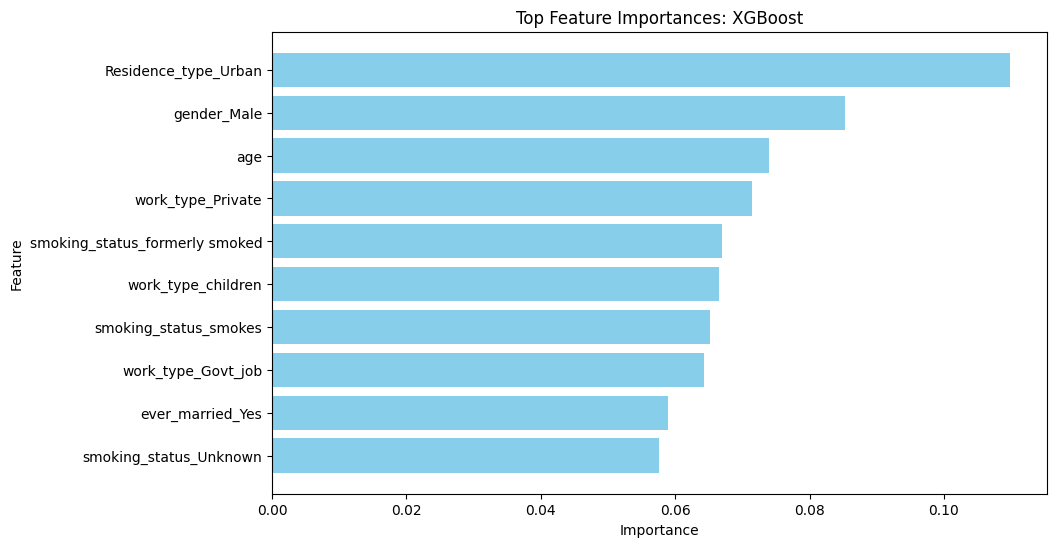

In [12]:
import matplotlib.pyplot as plt

# Get feature importances
importances = xgboost_pipeline.named_steps['classifier'].feature_importances_

# Get the names of the features
feature_names = X_smote_df.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Get the top N important predictors
N = 10  # Adjust as needed
top_features = sorted_feature_names[:N]
top_importances = importances[indices][:N]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances: XGBoost')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()



In [13]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Define the top N important predictors
N = 10  # Adjust as needed
top_features = sorted_feature_names[:N]

# Extract top features from the datasets
X_smote_top = X_smote_df[top_features]
X_test_top = X_test_onehot_df[top_features]

# Define the XGBoost model with top features
xgboost_model_top = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the pipeline including XGBoost model with top features
xgboost_pipeline_top = Pipeline(steps=[
    ('classifier', xgboost_model_top)
])

# Fit the model on the training data with top features
xgboost_pipeline_top.fit(X_smote_top, y_smote)

# Make predictions on the training and testing sets
y_train_pred_xgb_top = xgboost_pipeline_top.predict(X_smote_top)
y_test_pred_xgb_top = xgboost_pipeline_top.predict(X_test_top)

# Calculate accuracy for training and testing sets with top features
train_accuracy_xgb_top = accuracy_score(y_smote, y_train_pred_xgb_top)
test_accuracy_xgb_top = accuracy_score(y_test, y_test_pred_xgb_top)
train_f1_xgb_top = f1_score(y_smote, y_train_pred_xgb_top)
test_f1_xgb_top = f1_score(y_test, y_test_pred_xgb_top)

print(f'Train Accuracy (XGBoost with Top Features): {train_accuracy_xgb_top:.6f}')
print(f'Test Accuracy (XGBoost with Top Features): {test_accuracy_xgb_top:.6f}')
print(f'Train F1 Score (XGBoost with Top Features): {train_f1_xgb_top:.6f}')
print(f'Test F1 Score (XGBoost with Top Features): {test_f1_xgb_top:.6f}')


Train Accuracy (XGBoost with Top Features): 0.968982
Test Accuracy (XGBoost with Top Features): 0.790607
Train F1 Score (XGBoost with Top Features): 0.968241
Test F1 Score (XGBoost with Top Features): 0.286667


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=150,max_depth=10,min_samples_split=5,random_state=42)

# Define the pipeline including Random Forest model
rf_pipeline = Pipeline(steps=[
    ('classifier', rf_model)
])

# Fit the model on the SMOTE training data
rf_pipeline.fit(X_smote_df, y_smote)

# Make predictions on the training and testing sets
y_train_pred_rf = rf_pipeline.predict(X_smote_df)
y_test_pred_rf = rf_pipeline.predict(X_test_onehot_df)

# Calculate accuracy for training and testing sets
train_accuracy_rf = accuracy_score(y_smote, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
train_f1_rf = f1_score(y_smote, y_train_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)


print(f'Train Accuracy (Random Forest): {train_accuracy_rf:.6f}')
print(f'Test Accuracy (Random Forest): {test_accuracy_rf:.6f}')
print(f'Train F1 Score (Random Forest): {train_f1_rf:.6f}')
print(f'Test F1 Score (Random Forest): {test_f1_rf:.6f}')

Train Accuracy (Random Forest): 0.945783
Test Accuracy (Random Forest): 0.863014
Train F1 Score (Random Forest): 0.947052
Test F1 Score (Random Forest): 0.247312


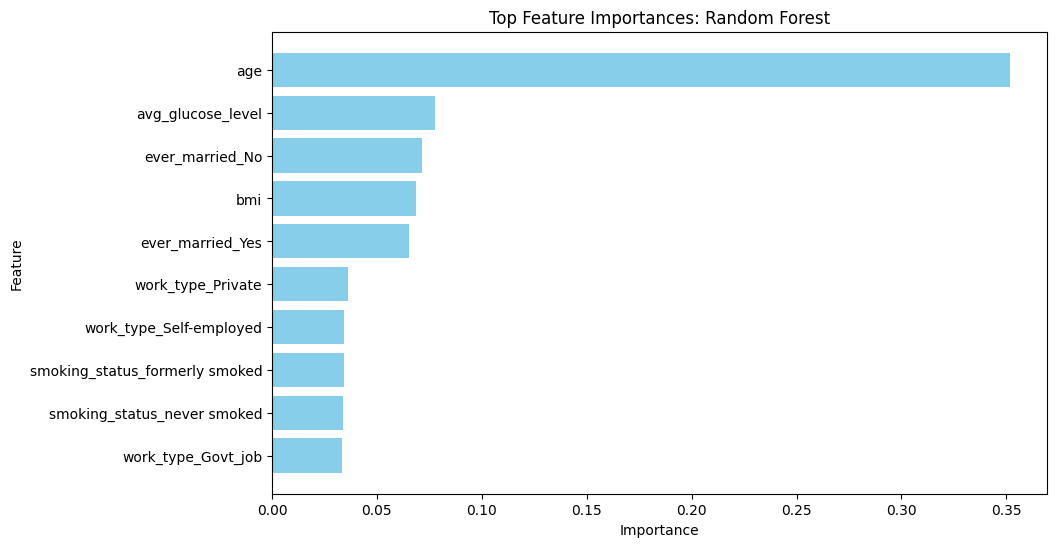

In [15]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Get the names of the features
feature_names = X_smote_df.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Get the top N important predictors
N = 10  # Adjust as needed
top_features = sorted_feature_names[:N]
top_importances = importances[indices][:N]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances: Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Define the logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Define the pipeline including logistic regression model
logistic_pipeline = Pipeline(steps=[
    ('classifier', logistic_model)
])

# Fit the model on the SMOTE training data
logistic_pipeline.fit(X_smote_df, y_smote)

# Make predictions on the training and testing sets
y_train_pred_logistic = logistic_pipeline.predict(X_smote_df)
y_test_pred_logistic = logistic_pipeline.predict(X_test_onehot_df)

# Calculate accuracy for training and testing sets
train_accuracy_logistic = accuracy_score(y_smote, y_train_pred_logistic)
test_accuracy_logistic = accuracy_score(y_test, y_test_pred_logistic)
train_f1_logistic = f1_score(y_smote, y_train_pred_logistic)
test_f1_logistic = f1_score(y_test, y_test_pred_logistic)


print(f'Train Accuracy (Logistic Regression): {train_accuracy_logistic:.6f}')
print(f'Test Accuracy (Logistic Regression): {test_accuracy_logistic:.6f}')
print(f'Train F1 Score (Logistic Regression): {train_f1_logistic:.6f}')
print(f'Test F1 Score (Logistic Regression): {test_f1_logistic:.6f}')

Train Accuracy (Logistic Regression): 0.788131
Test Accuracy (Logistic Regression): 0.745597
Train F1 Score (Logistic Regression): 0.796604
Test F1 Score (Logistic Regression): 0.285714


In [ ]:
logistic_pipeline.fit(X_smote_df, y_smote)

# Make predictions on the test set
y_test_pred_logistic = logistic_pipeline.predict(X_test_onehot_df)

# Calculate the confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, y_test_pred_logistic)

# Calculate class-wise accuracy
class_accuracies_logistic = conf_matrix_logistic.diagonal() / conf_matrix_logistic.sum(axis=1)

# Output the class-wise accuracy
for i, acc in enumerate(class_accuracies_logistic):
    print(f'Class {i} Accuracy: {acc:.6f}')

Class 0 Accuracy: 0.739583
Class 1 Accuracy: 0.838710


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline

# Define the top N important predictors
N = 10  # Adjust as needed
top_features_rf = sorted_feature_names[:N]

# Extract top features from the datasets
X_smote_top_rf = X_smote_df[top_features_rf]
X_test_top_rf = X_test_onehot_df[top_features_rf]

# Define the Random Forest model with top features
rf_model_top = RandomForestClassifier(n_estimators=150, max_depth=10, min_samples_split=5, random_state=42)

# Define the pipeline including Random Forest model with top features
rf_pipeline_top = Pipeline(steps=[
    ('classifier', rf_model_top)
])

# Fit the model on the training data with top features
rf_pipeline_top.fit(X_smote_top_rf, y_smote)

# Make predictions on the training and testing sets
y_train_pred_rf_top = rf_pipeline_top.predict(X_smote_top_rf)
y_test_pred_rf_top = rf_pipeline_top.predict(X_test_top_rf)

# Calculate accuracy for training and testing sets with top features
train_accuracy_rf_top = accuracy_score(y_smote, y_train_pred_rf_top)
test_accuracy_rf_top = accuracy_score(y_test, y_test_pred_rf_top)
train_f1_rf_top = f1_score(y_smote, y_train_pred_rf_top)
test_f1_rf_top = f1_score(y_test, y_test_pred_rf_top)

print(f'Train Accuracy (Random Forest with Top Features): {train_accuracy_rf_top:.6f}')
print(f'Test Accuracy (Random Forest with Top Features): {test_accuracy_rf_top:.6f}')
print(f'Train F1 Score (Random Forest with Top Features): {train_f1_rf_top:.6f}')
print(f'Test F1 Score (Random Forest with Top Features): {test_f1_rf_top:.6f}')


Train Accuracy (Random Forest with Top Features): 0.927839
Test Accuracy (Random Forest with Top Features): 0.820939
Train F1 Score (Random Forest with Top Features): 0.930656
Test F1 Score (Random Forest with Top Features): 0.214592


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Define the SVM model
svm_model = SVC(random_state=42)

# Define the pipeline including SVM model
svm_pipeline = Pipeline(steps=[
    ('classifier', svm_model)
])

# Fit the model on the SMOTE training data
svm_pipeline.fit(X_smote_df, y_smote)

# Make predictions on the training and testing sets
y_train_pred_svm = svm_pipeline.predict(X_smote_df)
y_test_pred_svm = svm_pipeline.predict(X_test_onehot_df)

# Calculate accuracy for training and testing sets
train_accuracy_svm = accuracy_score(y_smote, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
train_f1_svm = f1_score(y_smote, y_train_pred_svm)
test_f1_svm = f1_score(y_test, y_test_pred_svm)


print(f'Train Accuracy (SVM): {train_accuracy_svm:.6f}')
print(f'Test Accuracy (SVM): {test_accuracy_svm:.6f}')
print(f'Train F1 Score (SVM): {train_f1_svm:.6f}')
print(f'Test F1 Score (SVM): {test_f1_svm:.6f}')


Train Accuracy (SVM): 0.892335
Test Accuracy (SVM): 0.777886
Train F1 Score (SVM): 0.898132
Test F1 Score (SVM): 0.240803


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the KNN model
knn_model = KNeighborsClassifier()

# Define the pipeline with KNN
knn_pipeline = Pipeline(steps=[
    ('classifier', knn_model)
])

# Define the grid of hyperparameters to test for Grid Search CV
param_grid = {
    'classifier__n_neighbors': [5, 10, 15, 20],  # The possible values for k
}

# Define scoring metrics for Grid Search CV
scoring_metrics = {
    'accuracy': 'accuracy',
    'f1': make_scorer(f1_score, average='macro'),  # Using macro average for multi-class
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(
    knn_pipeline,
    param_grid,
    cv=5,
    scoring=scoring_metrics,  # You can include multiple metrics for scoring
    refit='accuracy',         # Choose the best model based on accuracy
    return_train_score=True
)

# Fit GridSearchCV to the SMOTE training data
grid_search.fit(X_smote_df, y_smote)

# Get the best model and its parameters
best_knn_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the testing set
y_test_pred_knn = best_knn_model.predict(X_test_onehot_df)

# Calculate accuracy and F1 score for the testing set
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
test_f1_knn = f1_score(y_test, y_test_pred_knn)

print(f"Optimal KNN Parameters: {best_params}")
print(f"Test Accuracy (KNN): {test_accuracy_knn:.6f}")
print(f"Test F1 Score (KNN): {test_f1_knn:.6f}")


Optimal KNN Parameters: {'classifier__n_neighbors': 5}
Test Accuracy (KNN): 0.739726
Test F1 Score (KNN): 0.152866


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Define the KNN model
knn_model = KNeighborsClassifier()

# Define the pipeline including KNN model
knn_pipeline = Pipeline(steps=[
    ('classifier', knn_model)
])

# Fit the model on the SMOTE training data
knn_pipeline.fit(X_smote_df, y_smote)

# Make predictions on the training and testing sets
y_train_pred_knn = knn_pipeline.predict(X_smote_df)
y_test_pred_knn = knn_pipeline.predict(X_test_onehot_df)

# Calculate accuracy for training and testing sets
train_accuracy_knn = accuracy_score(y_smote, y_train_pred_knn)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
train_f1_knn = f1_score(y_smote, y_train_pred_knn)
test_f1_knn = f1_score(y_test, y_test_pred_knn)


print(f'Train Accuracy (KNN): {train_accuracy_knn:.6f}')
print(f'Test Accuracy (KNN): {test_accuracy_knn:.6f}')
print(f'Train F1 Score (KNN): {train_f1_knn:.6f}')
print(f'Test F1 Score (KNN): {test_f1_knn:.6f}')


Train Accuracy (KNN): 0.941682
Test Accuracy (KNN): 0.739726
Train F1 Score (KNN): 0.944708
Test F1 Score (KNN): 0.152866


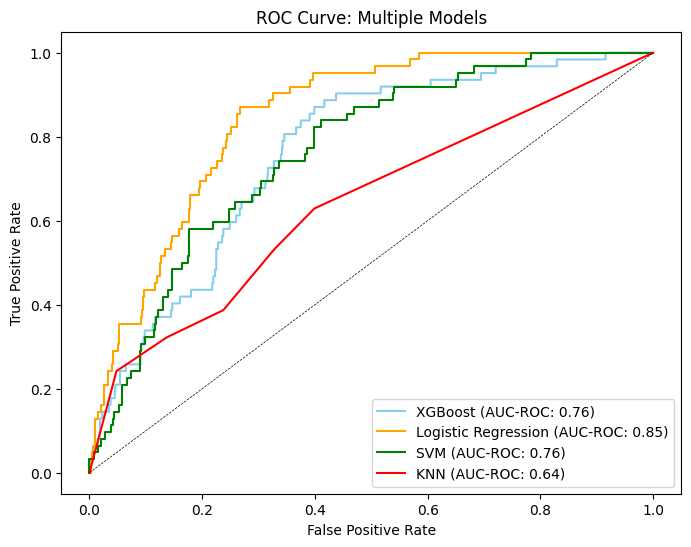

AUC-ROC Score for XGBoost: 0.762122
AUC-ROC Score for Logistic Regression: 0.845262
AUC-ROC Score for SVM: 0.763357
AUC-ROC Score for KNN: 0.638911


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class from each model
xgboost_probs = xgboost_pipeline.named_steps['classifier'].predict_proba(X_test_onehot_df)[:, 1]
logreg_probs = logistic_pipeline.named_steps['classifier'].predict_proba(X_test_onehot_df)[:, 1]
svm_probs = svm_pipeline.named_steps['classifier'].decision_function(X_test_onehot_df)
knn_probs = knn_pipeline.named_steps['classifier'].predict_proba(X_test_onehot_df)[:, 1]

# Calculate the ROC curves and AUC-ROC scores
fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, xgboost_probs)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)

auc_roc_xgboost = roc_auc_score(y_test, xgboost_probs)
auc_roc_logreg = roc_auc_score(y_test, logreg_probs)
auc_roc_svm = roc_auc_score(y_test, svm_probs)
auc_roc_knn = roc_auc_score(y_test, knn_probs)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgboost, tpr_xgboost, label=f'XGBoost (AUC-ROC: {auc_roc_xgboost:.2f})', color='skyblue')
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC-ROC: {auc_roc_logreg:.2f})', color='orange')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC-ROC: {auc_roc_svm:.2f})', color='green')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC-ROC: {auc_roc_knn:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', lw=0.5)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Multiple Models')
plt.legend(loc='lower right')
plt.show()

# Display the AUC-ROC scores
print(f'AUC-ROC Score for XGBoost: {auc_roc_xgboost:.6f}')
print(f'AUC-ROC Score for Logistic Regression: {auc_roc_logreg:.6f}')
print(f'AUC-ROC Score for SVM: {auc_roc_svm:.6f}')
print(f'AUC-ROC Score for KNN: {auc_roc_knn:.6f}')


parital dependence


In [22]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),

])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical columns
])

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)




In [24]:
from imblearn.over_sampling import SMOTE
import pandas as pd

X_train_onehot = preprocessor2.fit_transform(X_train)
X_test_onehot = preprocessor2.fit_transform(X_test)
onehot_feature_names = preprocessor2.transformers_[1][1].get_feature_names_out(input_features=categorical_features)
onehot_feature_names_train = onehot_feature_names[onehot_feature_names != 'gender_Other']
X_train_onehot_df = pd.DataFrame(X_train_onehot,columns = list(numeric_features)+list(onehot_feature_names_train))
X_test_onehot_df = pd.DataFrame(X_test_onehot,columns = list(numeric_features)+list(onehot_feature_names))
X_test_onehot_df.drop(columns=['gender_Other'], inplace=True)


# Assuming 'X' and 'y' are your feature and target variables
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_onehot, y_train)
X_smote_df = pd.DataFrame(X_smote, columns=X_train_onehot_df.columns)



In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Define the logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Define the pipeline including logistic regression model
logistic_pipeline = Pipeline(steps=[
    ('classifier', logistic_model)
])

# Fit the model on the SMOTE training data
logistic_pipeline.fit(X_smote_df, y_smote)

# Make predictions on the training and testing sets
y_train_pred_logistic = logistic_pipeline.predict(X_smote_df)
y_test_pred_logistic = logistic_pipeline.predict(X_test_onehot_df)

# Calculate accuracy for training and testing sets
train_accuracy_logistic = accuracy_score(y_smote, y_train_pred_logistic)
test_accuracy_logistic = accuracy_score(y_test, y_test_pred_logistic)
train_f1_logistic = f1_score(y_smote, y_train_pred_logistic)
test_f1_logistic = f1_score(y_test, y_test_pred_logistic)


print(f'Train Accuracy (Logistic Regression): {train_accuracy_logistic:.6f}')
print(f'Test Accuracy (Logistic Regression): {test_accuracy_logistic:.6f}')
print(f'Train F1 Score (Logistic Regression): {train_f1_logistic:.6f}')
print(f'Test F1 Score (Logistic Regression): {test_f1_logistic:.6f}')

Train Accuracy (Logistic Regression): 0.778390
Test Accuracy (Logistic Regression): 0.754403
Train F1 Score (Logistic Regression): 0.786464
Test F1 Score (Logistic Regression): 0.272464


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


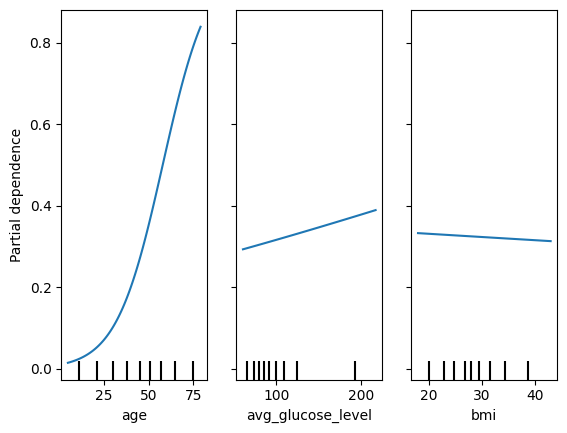

In [29]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence

# Assuming logistic_pipeline is your fitted logistic regression pipeline
# Assuming X_train_onehot_df is your feature matrix after preprocessing

# Specify the features for which you want to create partial dependence plots
features = ['age', 'avg_glucose_level', 'bmi']

# Compute partial dependence for the specified features
partial_dependence_results = partial_dependence(
    logistic_pipeline.named_steps['classifier'],  # Reference to your classifier in the pipeline
    X_train_onehot_df,  # The data used for training
    features=features,
    grid_resolution=10  # Number of points to evaluate along each feature
)

# Create and display the partial dependence plots
pdp_display = PartialDependenceDisplay.from_estimator(
    logistic_pipeline.named_steps['classifier'],
    X_train_onehot_df,
    features  # The features to plot
)


